<a href="https://colab.research.google.com/github/caileymm/tomato-ripeness-detector/blob/main/tomato_ripeness_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# Resize images from datasets
from PIL import Image
import os

base_path = '/content/drive/MyDrive/Colab Notebooks/datasets/'
train_path = os.path.join(base_path, 'train')
test_path = os.path.join(base_path, 'test')
valid_path = os.path.join(base_path, 'valid')
train_ripe_path = os.path.join(train_path, 'ripe')
train_unripe_path = os.path.join(train_path, 'unripe')
test_ripe_path = os.path.join(test_path, 'ripe')
test_unripe_path = os.path.join(test_path, 'unripe')
valid_ripe_path = os.path.join(valid_path, 'ripe')
valid_unripe_path = os.path.join(valid_path, 'unripe')


def process_image(image_path, data_type, is_ripe):
    try:
        # Determine the save directory
        if data_type == 'test':
          save_dir = os.path.join(base_path, 'test_resized')
        elif data_type == 'train':
          save_dir = os.path.join(base_path, 'train_resized')
        elif data_type == 'valid':
          save_dir = os.path.join(base_path, 'valid_resized')
        else:
            print(f"Error: Invalid data_type '{data_type}'")
            return

        if is_ripe:
          save_dir = os.path.join(save_dir, 'ripe')
        else:
          save_dir = os.path.join(save_dir, 'unripe')

        os.makedirs(save_dir, exist_ok=True) # Create directory if it doesn't exist

        file_name = os.path.basename(image_path)
        resized_image_path = os.path.join(save_dir, file_name)

        # Check if the resized image already exists
        if os.path.exists(resized_image_path):
            return

        # Open the image
        img = Image.open(image_path)

        # Convert to RGB if the image is in RGBA mode
        if img.mode == 'RGBA':
            img = img.convert('RGB')

        # Perform a transformation (e.g., resize)
        resized_img = img.resize((224, 224))

        # Save transformed image
        resized_img.save(resized_image_path)


    except FileNotFoundError:
        print(f"Error: Image file not found at {image_path}.")
    except Exception as e:
        print(f"An error occurred processing {image_path}: {e}")

# Process images in train>ripe
if os.path.exists(train_ripe_path):
    print(f"Processing images in {train_ripe_path}")
    for filename in os.listdir(train_ripe_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(train_ripe_path, filename)
            process_image(image_path, 'train', True)
else:
    print(f"Error: Directory not found at {train_ripe_path}")


# Process images in train>unripe
if os.path.exists(train_unripe_path):
    print(f"Processing images in {train_unripe_path}")
    for filename in os.listdir(train_unripe_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(train_unripe_path, filename)
            process_image(image_path, 'train', False)
else:
    print(f"Error: Directory not found at {train_unripe_path}")

# Process images in test>ripe
if os.path.exists(test_ripe_path):
    print(f"Processing images in {test_ripe_path}")
    for filename in os.listdir(test_ripe_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(test_ripe_path, filename)
            process_image(image_path, 'test', True)
else:
    print(f"Error: Directory not found at {test_ripe_path}")


# Process images in test>unripe
if os.path.exists(test_unripe_path):
    print(f"Processing images in {test_unripe_path}")
    for filename in os.listdir(test_unripe_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(test_unripe_path, filename)
            process_image(image_path, 'test', False)
else:
    print(f"Error: Directory not found at {test_unripe_path}")

# Process images in valid>ripe
if os.path.exists(valid_ripe_path):
    print(f"Processing images in {valid_ripe_path}")
    for filename in os.listdir(valid_ripe_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(valid_ripe_path, filename)
            process_image(image_path, 'valid', True)
else:
    print(f"Error: Directory not found at {valid_ripe_path}")


# Process images in valid>unripe
if os.path.exists(valid_unripe_path):
    print(f"Processing images in {valid_unripe_path}")
    for filename in os.listdir(valid_unripe_path):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(valid_unripe_path, filename)
            process_image(image_path, 'valid', False)
else:
    print(f"Error: Directory not found at {valid_unripe_path}")

Processing images in /content/drive/MyDrive/Colab Notebooks/datasets/train/ripe
Processing images in /content/drive/MyDrive/Colab Notebooks/datasets/train/unripe
Processing images in /content/drive/MyDrive/Colab Notebooks/datasets/test/ripe
Processing images in /content/drive/MyDrive/Colab Notebooks/datasets/test/unripe
Processing images in /content/drive/MyDrive/Colab Notebooks/datasets/valid/ripe
Processing images in /content/drive/MyDrive/Colab Notebooks/datasets/valid/unripe


In [3]:
# Install libraries from PyTorch and TorchVision
%pip install torch torchvision torchaudio

In [4]:
# Import libraries from PyTorch and TorchVision for data loading, model building, training, and evaluation.
%pip install torch torchvision torchaudio
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets
import torchvision.transforms
import torchvision.models
from torch.utils.data import DataLoader

In [5]:
# Define the root directory for the resized datasets
resized_base_path = '/content/drive/MyDrive/Colab Notebooks/datasets/'
train_resized_path = os.path.join(resized_base_path, 'train_resized')
test_resized_path = os.path.join(resized_base_path, 'test_resized')
valid_resized_path = os.path.join(resized_base_path, 'valid_resized')

# Define image transformations for the training dataset
train_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)), # Resize to 224x224
    torchvision.transforms.ToTensor(), # Convert to tensor
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize with ImageNet stats
])

# Define image transformations for the validation and test datasets
test_valid_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224, 224)), # Resize to 224x224
    torchvision.transforms.ToTensor(), # Convert to tensor
    torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize with ImageNet stats
])

# Create ImageFolder datasets
train_dataset = torchvision.datasets.ImageFolder(root=train_resized_path, transform=train_transforms)
valid_dataset = torchvision.datasets.ImageFolder(root=valid_resized_path, transform=test_valid_transforms)
test_dataset = torchvision.datasets.ImageFolder(root=test_resized_path, transform=test_valid_transforms)

print(f"Number of images in training dataset: {len(train_dataset)}")
print(f"Number of images in validation dataset: {len(valid_dataset)}")
print(f"Number of images in test dataset: {len(test_dataset)}")

batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Training batches: {len(train_dataloader)}")
print(f"Validation batches: {len(valid_dataloader)}")
print(f"Test batches: {len(test_dataloader)}")

Number of images in training dataset: 124
Number of images in validation dataset: 26
Number of images in test dataset: 27
Training batches: 4
Validation batches: 1
Test batches: 1


In [6]:
# Load a pre-trained ResNet model (e.g., ResNet50)
model = torchvision.models.resnet50(weights="ResNet50_Weights.DEFAULT")

# Freeze all the parameters in the network
for param in model.parameters():
    param.requires_grad = False

# Get the number of input features for the classifier layer
num_ftrs = model.fc.in_features

# Replace the classifier layer with a new one
# Assuming 2 classes: ripe and unripe
model.fc = nn.Linear(num_ftrs, 2)

# Define the device to train on
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

print("Pre-trained ResNet model loaded and modified.")
print(f"Using device: {device}")

Pre-trained ResNet model loaded and modified.
Using device: cuda


In [7]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.fc.parameters(), lr=0.001) # Only optimize the new classifier layer

In [8]:
%pip install matplotlib

Epoch 1/10, Loss: 0.6560
Validation Accuracy: 76.92%
Epoch 2/10, Loss: 0.5199
Validation Accuracy: 96.15%
Epoch 3/10, Loss: 0.4223
Validation Accuracy: 96.15%
Epoch 4/10, Loss: 0.3476
Validation Accuracy: 96.15%
Epoch 5/10, Loss: 0.3153
Validation Accuracy: 100.00%
Epoch 6/10, Loss: 0.2584
Validation Accuracy: 100.00%
Epoch 7/10, Loss: 0.2442
Validation Accuracy: 100.00%
Epoch 8/10, Loss: 0.2136
Validation Accuracy: 100.00%
Epoch 9/10, Loss: 0.1870
Validation Accuracy: 100.00%
Epoch 10/10, Loss: 0.1599
Validation Accuracy: 100.00%
Training finished.


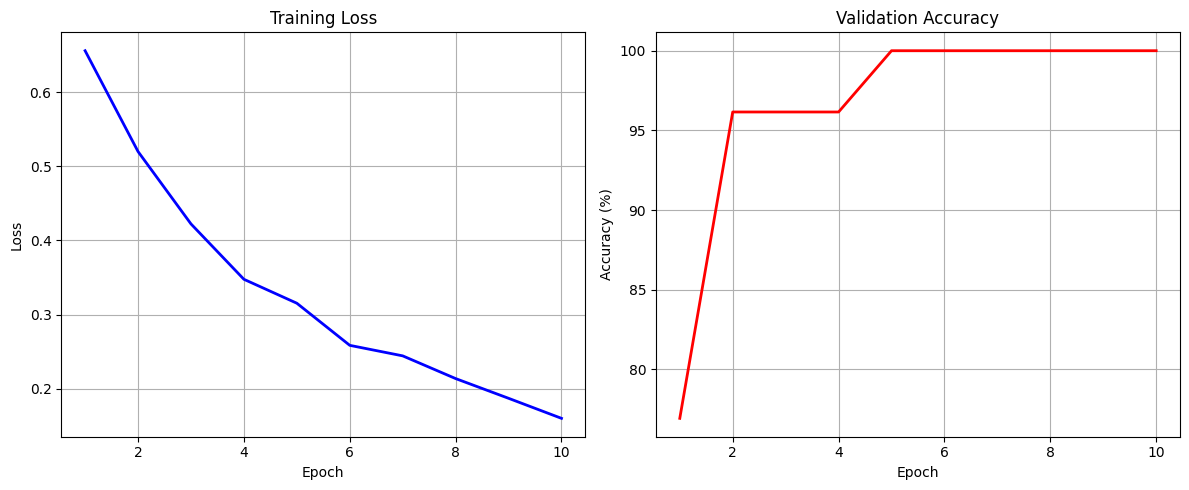

Test Accuracy: 96.30%


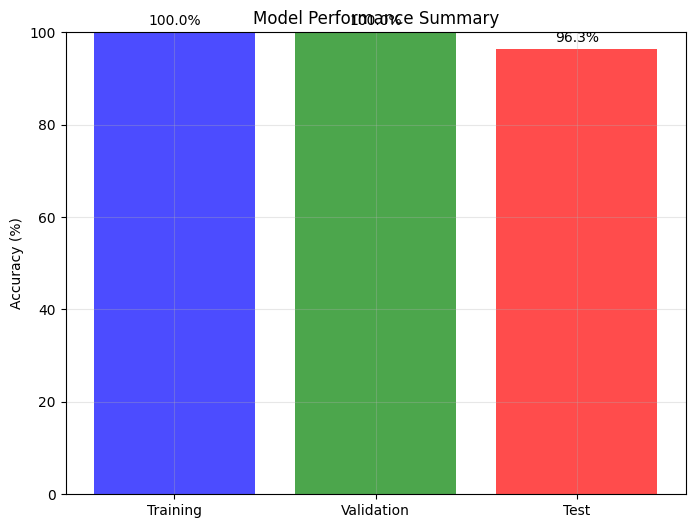

In [9]:
import matplotlib.pyplot as plt

# Training loop
num_epochs = 10 # You can adjust this number
train_losses = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # Zero the gradients
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backpropagate
        optimizer.step()  # Update weights

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_dataset)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}")
    train_losses.append(epoch_loss)

    # Validation step
    model.eval() # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad(): # Disable gradient calculation for validation
        for inputs, labels in valid_dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    valid_accuracy = 100 * correct / total
    print(f"Validation Accuracy: {valid_accuracy:.2f}%")
    val_accuracies.append(valid_accuracy)

print("Training finished.")

# Plot training loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, 'b-', linewidth=2)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

# Plot validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), val_accuracies, 'r-', linewidth=2)
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
model.eval() # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad(): # Disable gradient calculation for testing
    for inputs, labels in test_dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Show final results in a bar chart
plt.figure(figsize=(8, 6))
categories = ['Training', 'Validation', 'Test']
accuracies = [max(val_accuracies) if val_accuracies else 0, max(val_accuracies) if val_accuracies else 0, test_accuracy]
colors = ['blue', 'green', 'red']

bars = plt.bar(categories, accuracies, color=colors, alpha=0.7)
plt.title('Model Performance Summary')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)

# Add value labels on bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
             f'{accuracy:.1f}%', ha='center', va='bottom')

plt.grid(True, alpha=0.3)
plt.show()